# 🏦 Loan Prediction using 🎯 Decision Tree & 🌳 Random Forest

📁 **Dataset:** Loan Prediction Dataset  
🎯 **Objective:** Predict whether a loan will be approved (1) or not (0)  
🔍 **Algorithms Used:**  
- 🎯 **Decision Tree Classifier**  
- 🌳 **Random Forest Classifier**  

📊 **Type of Problem:** Binary Classification  


## 1. Import Necessary Libraries

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

## 2. Load datset

In [23]:
df = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")

In [24]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## 3. Information about The dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [26]:
df_numeric = df.select_dtypes(include = "number")

In [27]:
df_numeric

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


## 4. Exploratory data analysis 

### Distribution Among Numeric Columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


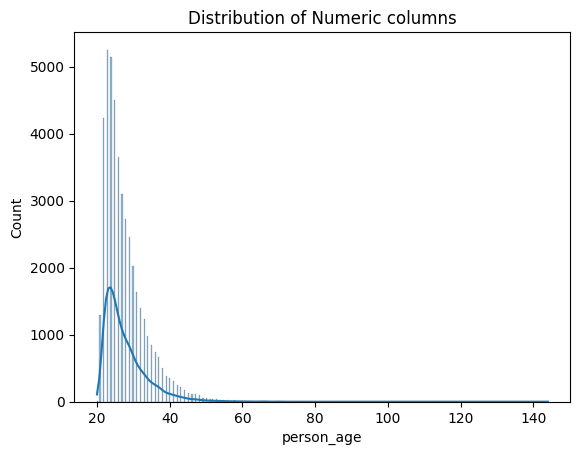

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


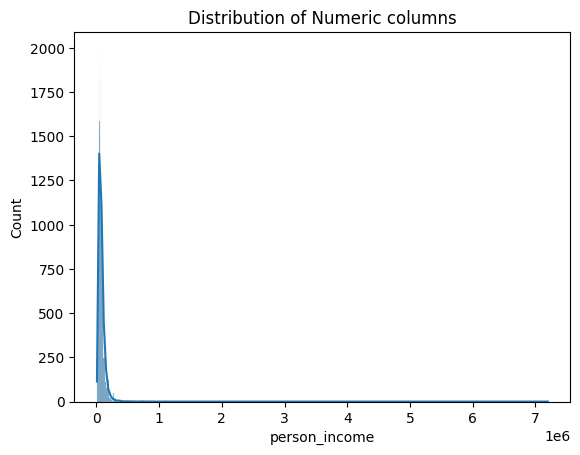

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


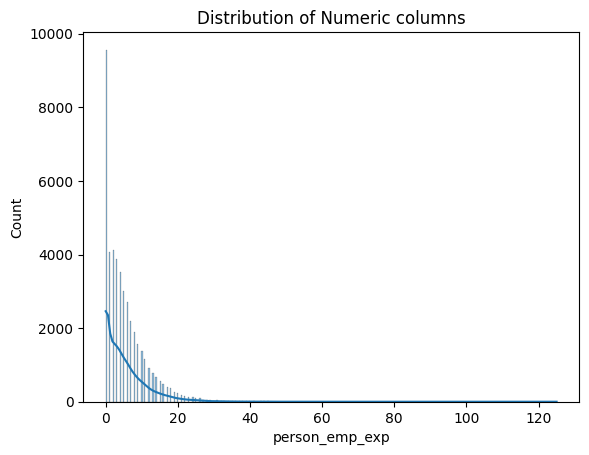

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


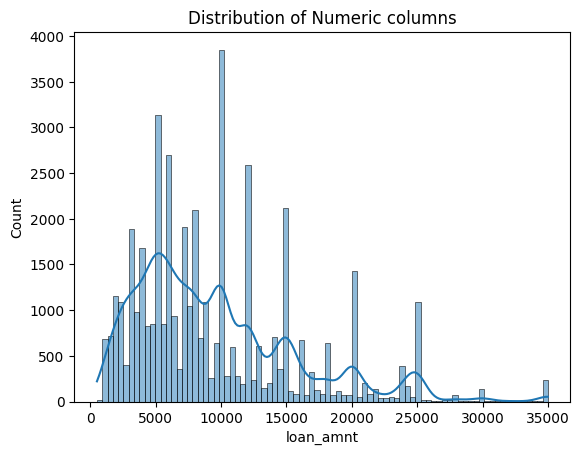

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


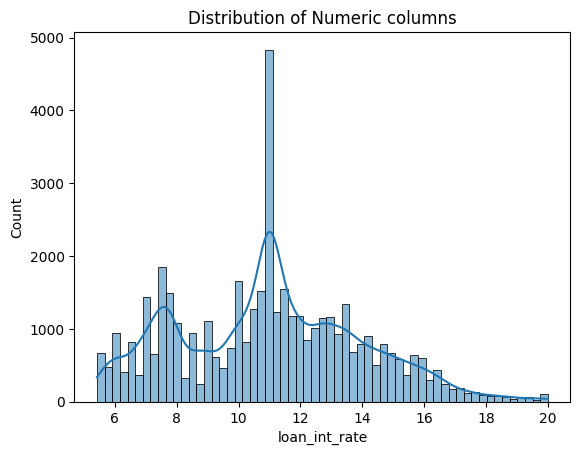

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


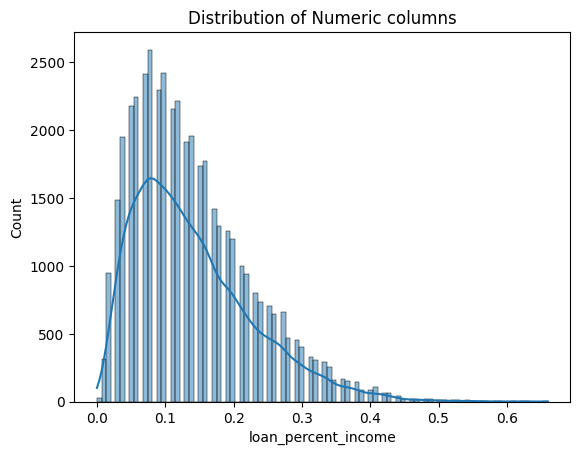

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


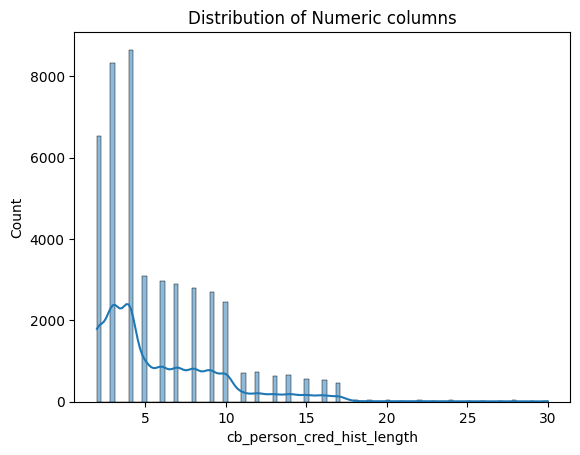

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


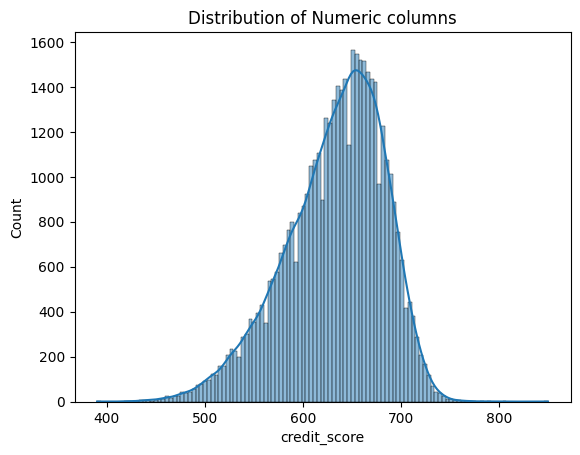

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


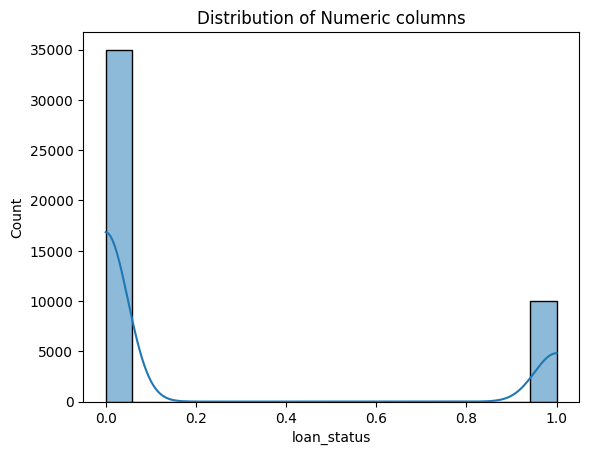

In [28]:
for col in df_numeric:
    sns.histplot(df[col],kde=True)
    plt.title("Distribution of Numeric columns")
    plt.show()

### Correaltion Between Numeric  Columns

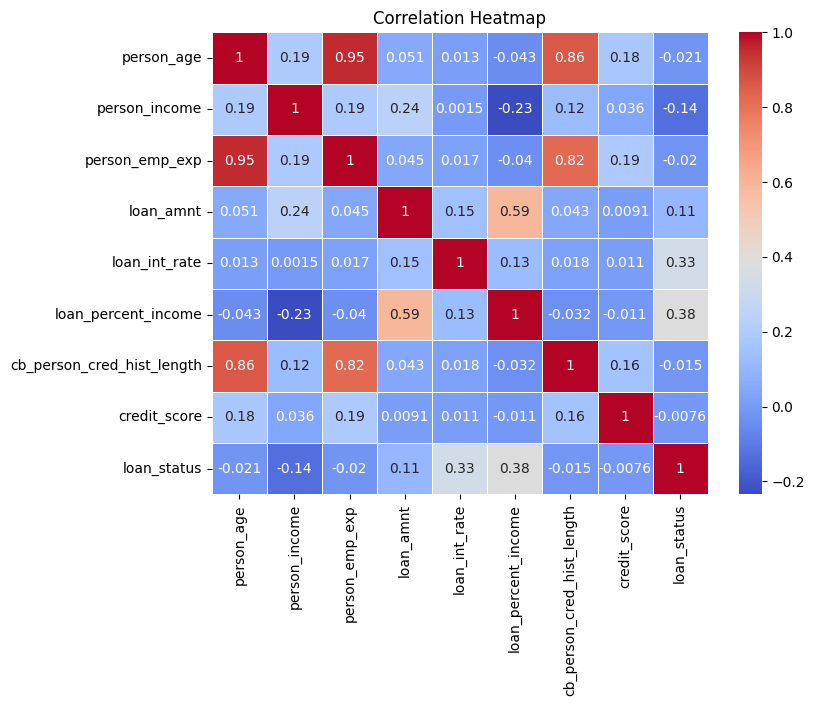

In [29]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### Distribution among Categorical Columns

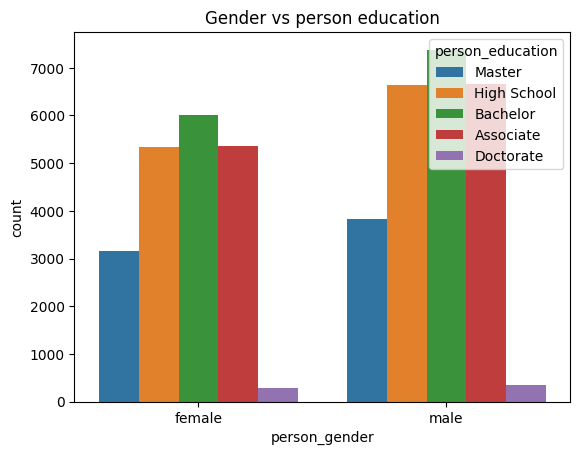

In [31]:
sns.countplot(x='person_gender', hue='person_education', data=df)
plt.title("Gender vs person education")
plt.show()

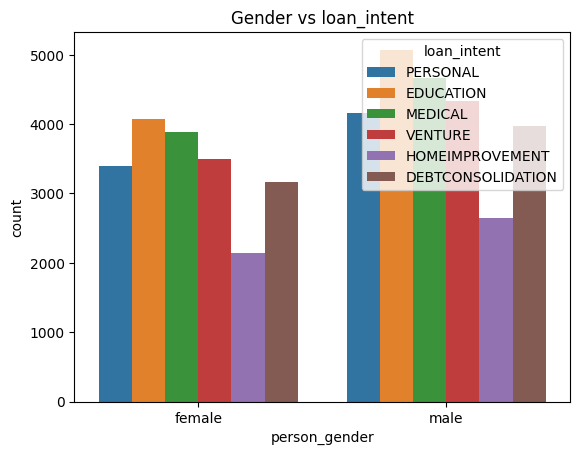

In [32]:
sns.countplot(x='person_gender', hue='loan_intent', data=df)
plt.title("Gender vs loan_intent")
plt.show()

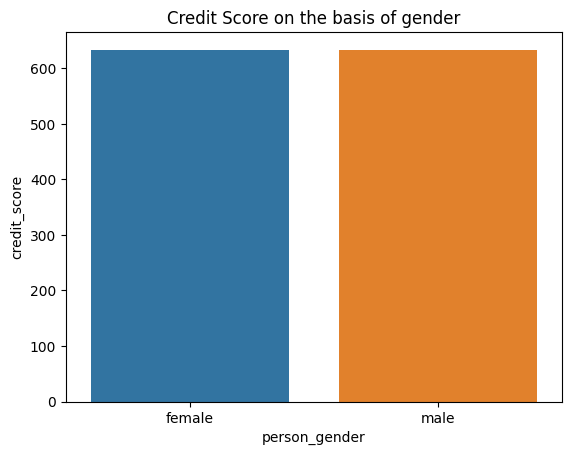

In [33]:
sns.barplot(x='person_gender', y='credit_score', data=df)
plt.title("Credit Score on the basis of gender")
plt.show()

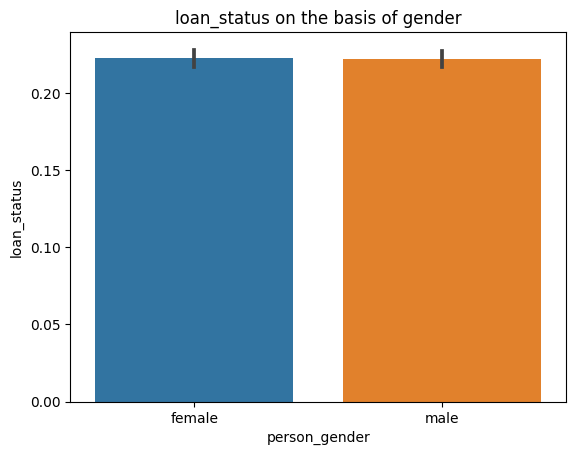

In [34]:
sns.barplot(x='person_gender', y='loan_status', data=df)
plt.title("loan_status on the basis of gender")
plt.show()

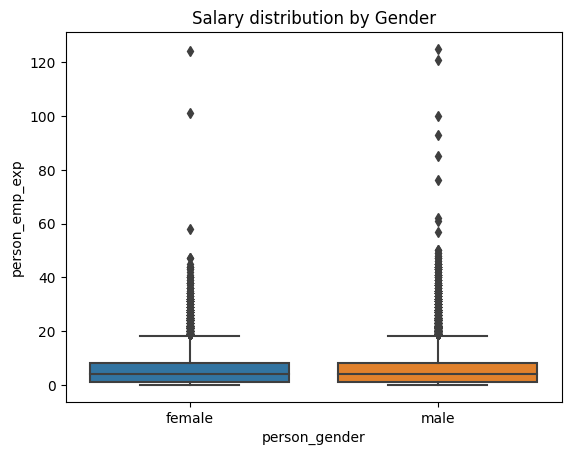

In [35]:
sns.boxplot(x='person_gender', y='person_emp_exp', data=df)
plt.title("Salary distribution by Gender")
plt.show()

### Describe the dataset 

In [82]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


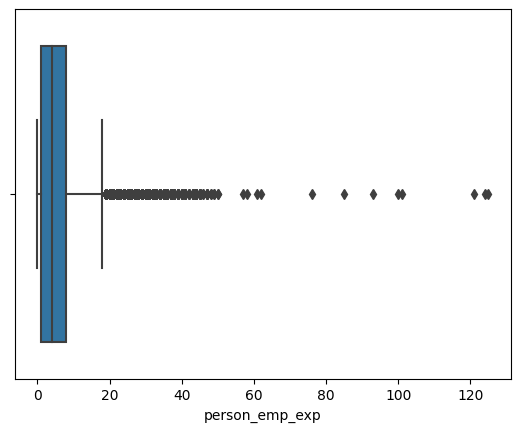

In [83]:
sns.boxplot(x=df['person_emp_exp'])  # Replace 'feature_name' with numeric column name
plt.show()

## 5. Separate the Independent columns and Dependent columns 

In [36]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

## 6. Import Necessary libaries

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


## 7. Import Necessary algorithms

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [42]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [43]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [55]:
numeric_cols = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income',
               'cb_person_cred_hist_length','credit_score']
categoric_cols = ['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
ordinal_cols = ['person_education']

In [56]:
education_categories = [['High School','Bachelor','Associate','Master','Doctorate']]

In [57]:
one = OneHotEncoder(handle_unknown = 'ignore',drop = 'first')
scaler = StandardScaler()
ordinal = OrdinalEncoder(categories = education_categories)

## 8. Encode the Columns using ColumnTransformer for transforming the columns 

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot',one,categoric_cols),
        ('ordinal',ordinal,ordinal_cols),
        ('scaler',scaler,numeric_cols),
    ]
)

## 8. Make Object for the algorithm and hyperparameter

In [99]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5,random_state=42)
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2,random_state=42)

## 9. using pipeline for fit the model using RandomForest

In [85]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('rf',rf)
])

## 10. using Pipeline for fit and using decision tree algorithm

In [101]:
pipeline2 = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('dt',dt)
])

In [86]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['person_gender',
                                                   'person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Associate',
                                                                              'Master',
                                                                              'Doctorate']]),
                                                  ['person_education']),
                                                 ('scaler', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score'])])),
                ('rf', RandomForestClassifier(max_depth=5, random_state=42))])

In [102]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['person_gender',
                                                   'person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Associate',
                                                                              'Master',
                                                                              'Doctorate']]),
                                                  ['person_education']),
                                                 ('scaler', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score'])])),
                ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))])

## 11. predict the dependent variable using predict function for randomforest algorithm 

In [113]:
y_pred = pipeline.predict(X_test)

## 12. predict the dependent variable using predict function for decision tree classifier

In [103]:
y_pred2 = pipeline2.predict(X_test)

In [88]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [104]:
y_pred2

array([0, 0, 1, ..., 0, 0, 0])

## 14. Check Accuracy for Random forest

In [89]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94      6990\n           1       0.92      0.65      0.76      2010\n\n    accuracy                           0.91      9000\n   macro avg       0.92      0.82      0.85      9000\nweighted avg       0.91      0.91      0.90      9000\n'

## 15. check accuracy for decision tree classifier

In [105]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
classification_report(y_test,y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95      6990\n           1       0.88      0.75      0.81      2010\n\n    accuracy                           0.92      9000\n   macro avg       0.91      0.86      0.88      9000\nweighted avg       0.92      0.92      0.92      9000\n'

In [90]:
y_train_pred = pipeline.predict(X_train)

In [110]:
y_train_pred2 = pipeline2.predict(X_train)

In [111]:
y_train_pred2

array([0, 0, 0, ..., 0, 1, 0])

In [91]:
y_train_pred

array([0, 0, 0, ..., 0, 1, 0])

## 16. check accuracy for training datasetfor both|

In [114]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
classification_report(y_train,y_train_pred)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


'              precision    recall  f1-score   support\n\n           0       0.91      0.99      0.95     28010\n           1       0.93      0.66      0.77      7990\n\n    accuracy                           0.91     36000\n   macro avg       0.92      0.82      0.86     36000\nweighted avg       0.92      0.91      0.91     36000\n'

In [115]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
classification_report(y_train,y_train_pred2)

'              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96     28010\n           1       0.91      0.76      0.83      7990\n\n    accuracy                           0.93     36000\n   macro avg       0.92      0.87      0.89     36000\nweighted avg       0.93      0.93      0.93     36000\n'